<a href="https://colab.research.google.com/github/gandalf1819/20Newsgroups-data-mining/blob/master/CS6053_Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS6053 Foundations of Data Science
## Homework 5

Student Name: **Chinmay Wyawahare**

Student Netid:  **cnw282**
***

### Part 1: Critique this plan (8 points)
1\. Your CIO invited his buddy from Tok Aton consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Tok Aton, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Tok Aton says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Tok Aton's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--------------------------------------------------------------------------
                            Targeted Audience Expansion             
                      Prepared by Tok Aton Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Tok Aton) have a large database of consumers who can be targeted.  We will build a predictive model to estimate which of these consumers are the most likely to adopt the product, and then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adoption of the service by a consumer, based on the data on your current customers of this service.  The model will be based on their demographics and their usage of the service. We believe that logistic regression is the best choice of method because it is a tried-and-true statistical modeling technique, and we can easily interpret the coefficients of the model to infer whether the attributes are statistically significant, and whether they make sense. If they are statistically significant and they do make sense, then we can have confidence that the model will be accurate in predicting service uptake. We will apply the model to our large database of consumers, and select out those who have not yet subscribed and whom the LR model predicts to be the most likely to subscribe.  To these we will send the targeted offer. As this is a fixed-profit-per-customer service, this also will in effect rank them by expected profit.
--------------------------------------------------------------------------
```

1.   Tok Aton stresses on the importance of attributes that are statistically significant in the model using their coefficients. But this won't be the best method as there can different coefficients for different attributes which can't help us to determine the significant contributors based on attributes. Instead, we can find out correlation between attribute and target.

2.   In this problem, the data used in this model is taken from the customers of this service but we don't have much data for the people who do not use or like the service. We need to have more data of people who don't want to use the service and also for the people who have used the service but quickly left the service. Once we have the data for both the classes using downsampling techniques.

3.   Instead of performing just Linear Regression, we should use XGBoost, KNN, Random Forest and Decision Trees to predict adoption of the service by a customer based on the data on your current customers of this service. We can have a comparative study over these supervised learning techniques and adopt the best strategy based on metrics like model accuracy, precision, recall, correlation matrix to observe the contributing factors to improve the targeting of the new service. 

4.   By analysing customer churn influx and outflux, we can retain old and new customers by rewarding the old customers with perks and offers and at the same time offering plans to new customers at reduced costs to lure and target the new customers to increase the customer base. 



### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

### The dataset and further descriptions can be found here:
https://snap.stanford.edu/data/wiki-RfA.html (Download the dataset from the website)

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
wiki_dict = {}
with open("/content/gdrive/My Drive/CS6053_HW5/wiki-RfA.txt") as fin:
    for line in fin:
        if not len(line)<=1:
            key, value = line.split(":",1)
            if key in wiki_dict:
                wiki_dict[key].append(value)
            else:
                wiki_dict[key]=[value]

wiki_df = pd.DataFrame(wiki_dict)
wiki_df.to_csv("/content/gdrive/My Drive/CS6053_HW5/wiki.csv")

In [0]:
wiki_df = pd.read_csv("/content/gdrive/My Drive/CS6053_HW5/wiki.csv")
wiki_df = wiki_df.replace('\n','', regex=True)
wiki_df = wiki_df.drop("Unnamed: 0",axis=1)
wiki_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [0]:
print("Previous Values: ", wiki_df['VOT'].unique())
wiki_df['VOT'] = wiki_df['VOT'].replace(-1,0)
print("New Values: ", wiki_df['VOT'].unique())
wiki_df.head()

Previous Values:  [1 0]
New Values:  [1 0]


,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."


3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [0]:
import re
from sklearn.model_selection import train_test_split

x = wiki_df["TXT"]
Y = wiki_df['VOT']

# Data Cleaning
features = []
for sentence in range(0, len(x)):
    # Eliminate special characters
    feature = re.sub(r'\W', ' ', str(X[sentence]))
    # Eliminate single characters
    feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', feature)
    # Eliminate single characters from the start
    feature = re.sub(r'\^[a-zA-Z]\s+', ' ', feature) 
    # Replace multiple spaces occurences with single space
    feature = re.sub(r'\s+', ' ', feature, flags=re.I)
    # Eliminate prefixed 'b'
    feature = re.sub(r'^b\s+', '', feature)
    # Convert to Lower
    feature = feature.lower()
    features.append(feature)

# Create train/test split with training data - 75% and test data - 25%
X = pd.Series(features)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Create CountVectorizer
# Using original single words as bigrams and "English" stop word list
count_vec = CountVectorizer(binary = True,ngram_range=(1,2),stop_words=stopwords.words('english'))
count_vec.fit(X_train)

X_train_vec = vec.transform(X_train)
X_test_vec = vec.transform(X_test)

# Create TfidfVectorizer
# Using original single words as bigrams and "English" stop word list
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# LR vec
lr1 = LogisticRegression()
lr1.fit(X_train_vec, y_train)
pred_lr_vec = lr1.predict(X_test_vec)
pred_proba_lr_vec = lr1.predict_proba(X_test_vec)[::,1]
print("Logistic Regression - Count Vectorizer: ",np.mean(pred_lr_vec == y_test))

# LR Tfidf
lr2 = LogisticRegression()
lr2.fit(X_train_tfidf, y_train)
pred_lr_tfidf = lr2.predict(X_test_tfidf)
pred_proba_lr_tfidf = lr2.predict_proba(X_test_tfidf)[::,1]
print("Logistic Regression - tfidf Vectorizer: ", np.mean(pred_lr_tfidf == y_test))

# BNB vec 
bnb1 = BernoulliNB()
bnb1.fit(X_train_vec, y_train)
pred_bnb_vec = bnb1.predict(X_test_vec)
pred_proba_bnb_vec = bnb1.predict_proba(X_test_vec)[::,1]
print("BernoulliNB - vec Vectorizer: ", np.mean(pred_bnb_vec == y_test))

# BNB Tdidf
bnb2 = BernoulliNB()
bnb2.fit(X_train_tfidf, y_train)
pred_bnb_tfidf = bnb2.predict(X_test_tfidf)
pred_proba_bnb_tfidf = bnb2.predict_proba(X_test_tfidf)[::,1]
print("BernoulliNB - tfidf Vectorizer", np.mean(pred_bnb_tfidf == y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression - Count Vectorizer:  0.9658254150779721
Logistic Regression - tfidf Vectorizer:  0.9618915047711272
BernoulliNB - vec Vectorizer:  0.8129476083842724
BernoulliNB - tfidf Vectorizer 0.8129476083842724


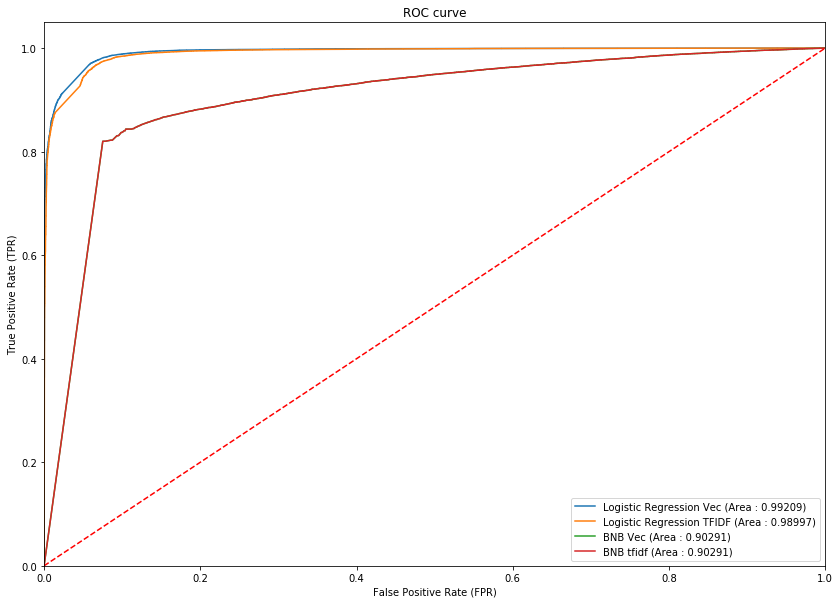

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Logistic Regression
logit_roc_auc_vec = roc_auc_score(y_test,pred_proba_lr_vec)
fpr1, tpr1, _1 = metrics.roc_curve(y_test, pred_proba_lr_vec)

logit_roc_auc_tfidf = roc_auc_score(y_test,pred_proba_lr_tfidf)
fpr2, tpr2, _2 = metrics.roc_curve(y_test, pred_proba_lr_tfidf)

# BNB
bnb_roc_auc_vec = roc_auc_score(y_test,pred_proba_bnb_vec)
fpr3, tpr3, _3 = metrics.roc_curve(y_test, pred_proba_bnb_vec)

bnb_roc_auc_tfidf = roc_auc_score(y_test,pred_proba_bnb_tfidf)
fpr4, tpr4, _4 = metrics.roc_curve(y_test, pred_proba_bnb_tfidf)

plt.figure(figsize=(14,10))
plt.plot(fpr1, tpr1, label='Logistic Regression Vec (Area : %0.5f)' % logit_roc_auc_vec)
plt.plot(fpr2, tpr2, label='Logistic Regression TFIDF (Area : %0.5f)' % logit_roc_auc_tfidf)

plt.plot(fpr3, tpr3, label='BNB Vec (Area : %0.5f)' % bnb_roc_auc_vec)
plt.plot(fpr4, tpr4, label='BNB tfidf (Area : %0.5f)' % bnb_roc_auc_tfidf)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

*Explanation* here!

'Naive Bayes' assumes that the features are conditionally independent. This assumption doesn't necessarily hold true for all cases as real data sets are never perfectly independent, rather they can be close. 
Thus, Naive Bayes has a higher bias and lower variance when compared to 'Logistic Regression'.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [0]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

wiki_df = pd.read_csv("/content/gdrive/My Drive/CS6053_HW5/wiki.csv")
wiki_df = wiki_df.replace('\n','', regex=True)
wiki_df = wiki_df.drop("Unnamed: 0",axis=1)

d1=pd.DataFrame(df['SRC'].unique())

d2=pd.DataFrame(df['TGT'].unique())

d3=d1.append(d2)
d3.columns=['un']

d4=pd.DataFrame(d3.un.unique())
d4=d4.reset_index()
d4.columns=['old_index','unique_nodes']
d4=d4.drop('old_index',axis=1)
d4=d4.reset_index()
d4=d4.set_index('unique_nodes')
mapping=d4.to_dict()

wiki_df=wiki_df.replace({'SRC': mapping['index'], 'TGT': mapping['index']})
wiki_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."


2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [0]:
import networkx as nx

df2=wiki_df[['SRC','TGT','VOT','RES']]
df2.columns=['source','target','weights','resol']
Gwik=nx.from_pandas_edgelist(df2,edge_attr=True)

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [0]:
print(nx.info(Gwik))

Name: 
Type: Graph
Number of nodes: 11381
Number of edges: 181999
Average degree:  31.9830


4\. Compute the degree, betweness and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [0]:
print("Degree Centrality",nx.degree_centrality(Gwik))
print("Betweness Centrality",nx.betweenness_centrality(Gwik))
print("Closness Centrality",nx.closeness_centrality(Gwik))


Degree Centrality {'Steel1943': 0.000351493848857645, 'BDD': 0.012214411247803165, 'Cuchullain': 0.0057117750439367315, 'INeverCry': 0.011423550087873463, 'Cncmaster': 0.0018453427065026364, 'Miniapolis': 0.013093145869947276, 'Sven Manguard': 0.010632688927943761, 'Ramaksoud2000': 0.0005272407732864675, 'RockMagnetist': 0.009402460456942005, 'Carrite': 0.01985940246045694, 'Someguy1221': 0.011159929701230229, 'Secret': 0.031985940246045695, 'Dennis Brown': 0.020123022847100176, 'MJ94': 0.0033391915641476275, 'King of Hearts': 0.02803163444639719, 'Go Phightins!': 0.004569420035149385, 'Hahc21': 0.008699472759226714, 'TBrandley': 0.0029876977152899827, 'Mazca': 0.02311072056239016, 'Pratyya Ghosh': 0.0021968365553602814, 'Film at 11': 8.787346221441125e-05, 'Nyttend': 0.007820738137082601, 'SlimVirgin': 0.03101933216168717, 'Ducknish': 0.0005272407732864675, 'Bluerasberry': 0.00421792618629174, 'DanielTom': 0.000351493848857645, 'RightCowLeftCoast': 0.0012302284710017574, 'Boing! said 

'Betweness centrality' and 'closeness centrality' are important measures in this problem as we use these metrics to visualize the graph using vote values and resolution values for the questions 5 and 6.

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (3 points)

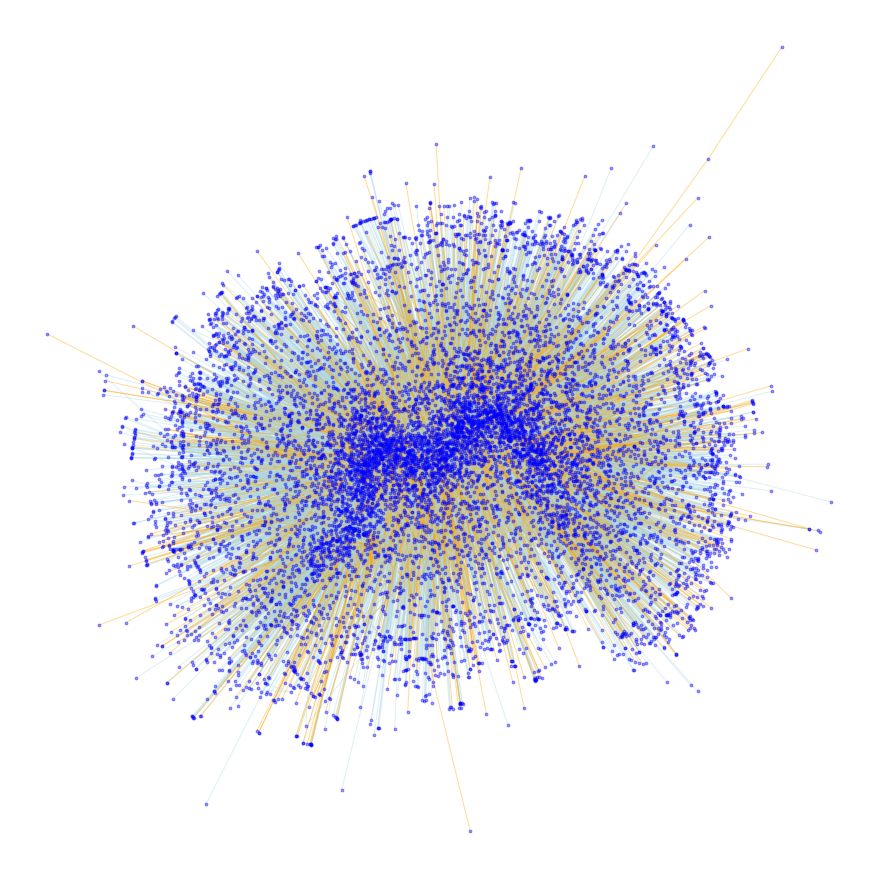

In [0]:
color=['#ADD8E6' if Gwik.get_edge_data(u, v)['weights']==1 else '#FFA500' for u, v in Gwik.edges()]
plt.figure(figsize=(12, 12))
nx.draw(Gwik, edge_color=color, node_color="blue", node_size=8,alpha=0.4)
plt.show()

We use '#ADD8E6' color to represent node and edge links for which the value of 'VOT' (edge) is 1 and '#FFA500' color to represent the rest of the node and edges. This results in a dense graph cluster describing the node and edges based on the values of 'VOT' for the respective links.

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (Optional, for a bonus: 2 points)

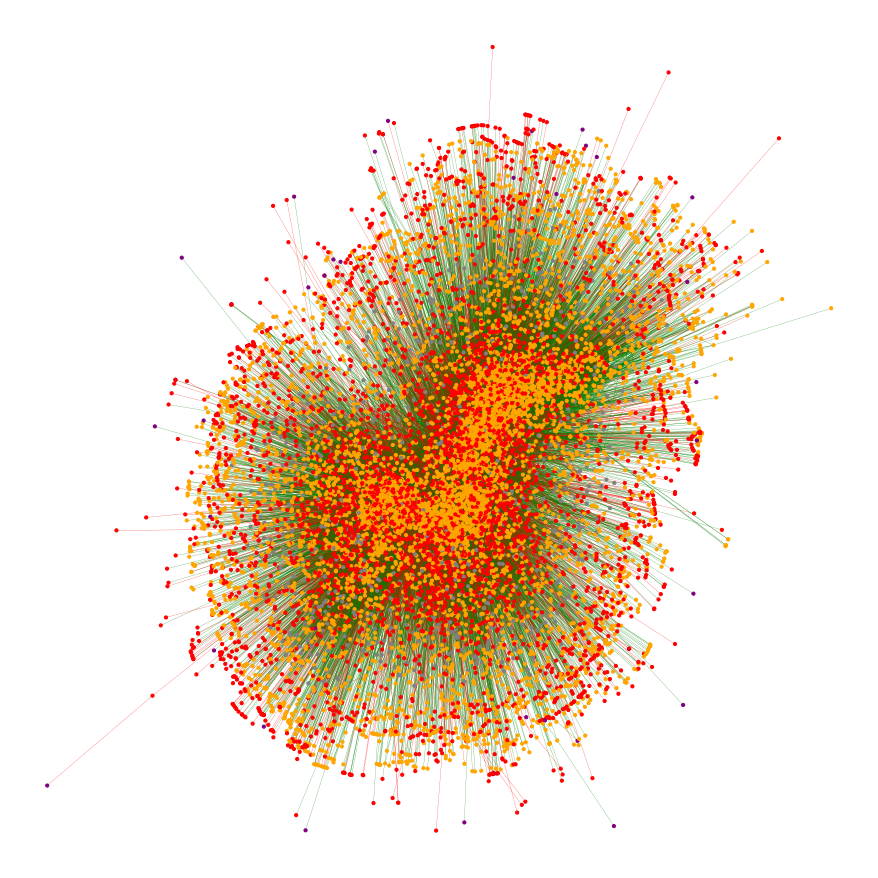

In [0]:
node_result = dict()
plt.figure(figsize=(12, 12))
for u, v in Gwik.edges():
    if(v in node_result):
        #if(node_result[v] != Gwik.get_edge_data(u, v)['resolution']):
        node_result[v] = node_result[v]+Gwik.get_edge_data(u, v)['resol']
    else:
        node_result[v] = Gwik.get_edge_data(u, v)['resol']
node_colors=[]

for node in Gwik.nodes():
    if(node in node_result):
        node_colors.append('orange' if node_result[node]>0 else 'grey' if node_result[node]==0 else 'red')
    else:
        node_colors.append('purple')
nx.draw(Gwik, edge_color=color, node_size=10, width=0.2, node_color=node_colors)

We include 'RES' in the dataframe and create a mapped column named 'col'. We further create a list node_result to store node-edge information. While plotting the graph, if the node's vote > 0, we use 'orange' color to represent the node else 'grey'. If node'vote = 0, we use 'red' color to represent the node. If the node is not present in the node_result list, we use 'purple' to denote that node.